In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

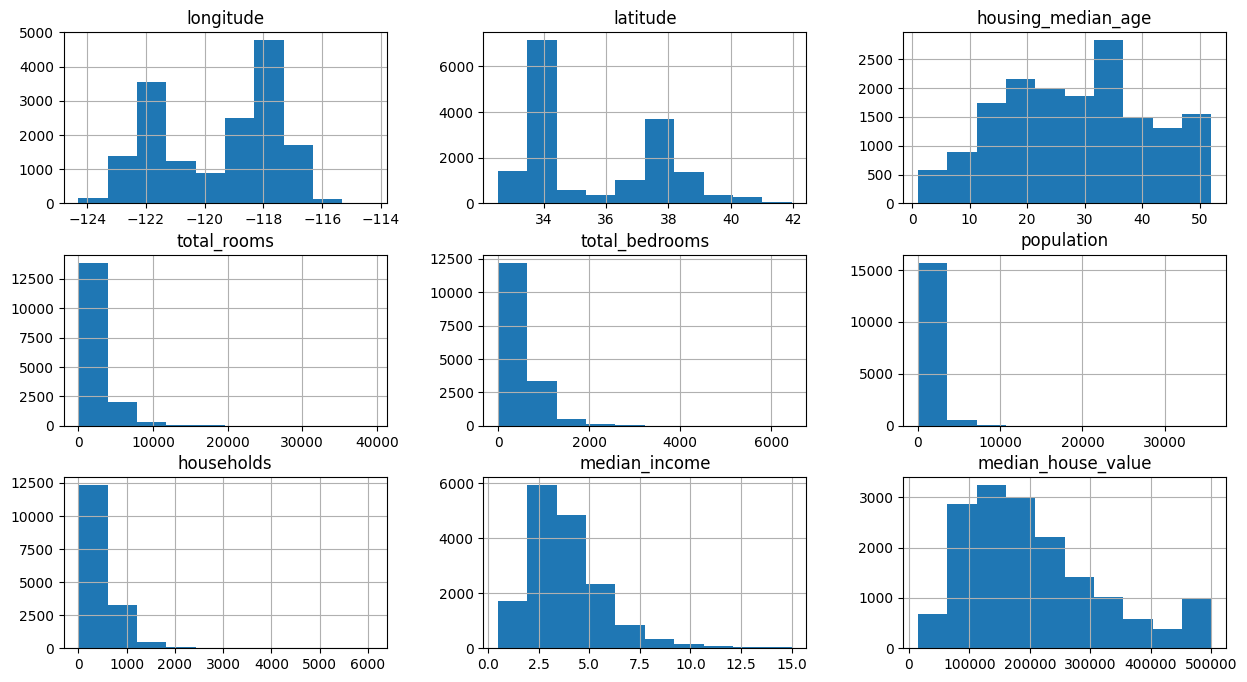

In [9]:
train_data = X_train.join(y_train)
train_data.hist(figsize=(15, 8))

<Axes: >

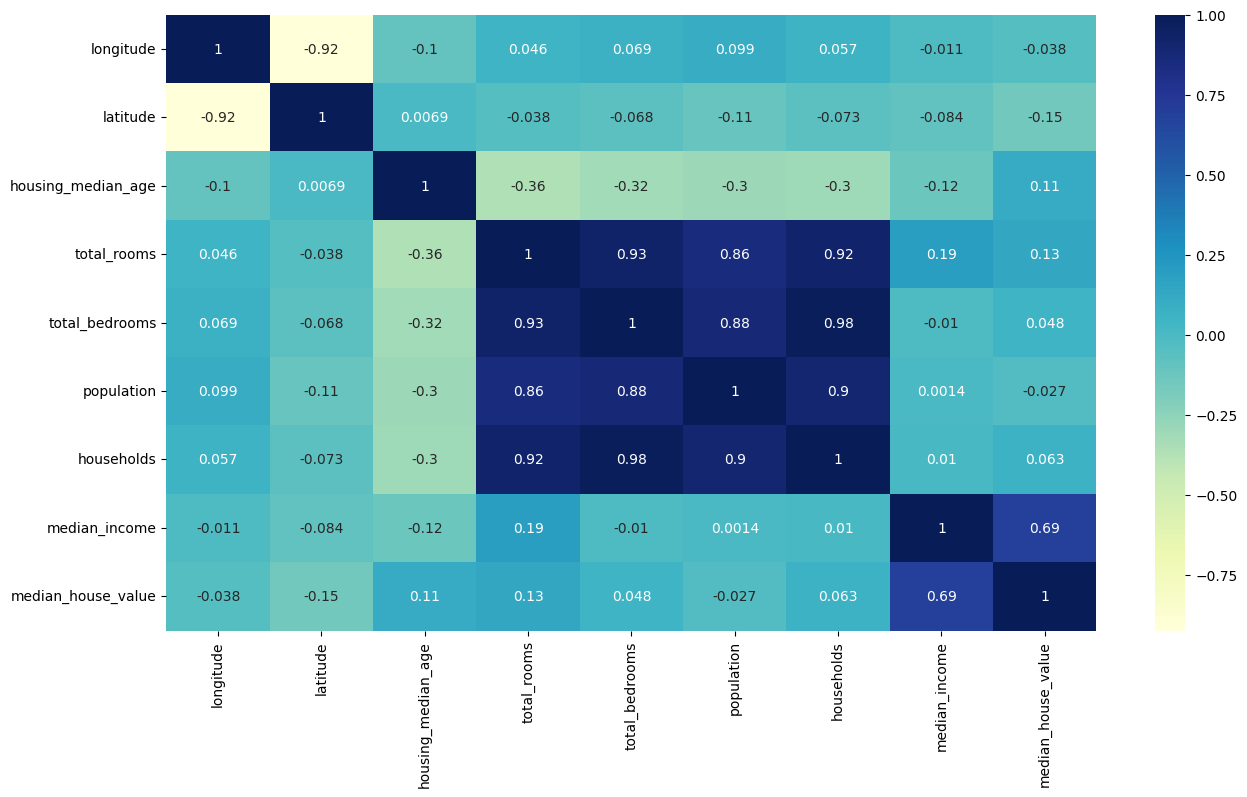

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [15]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

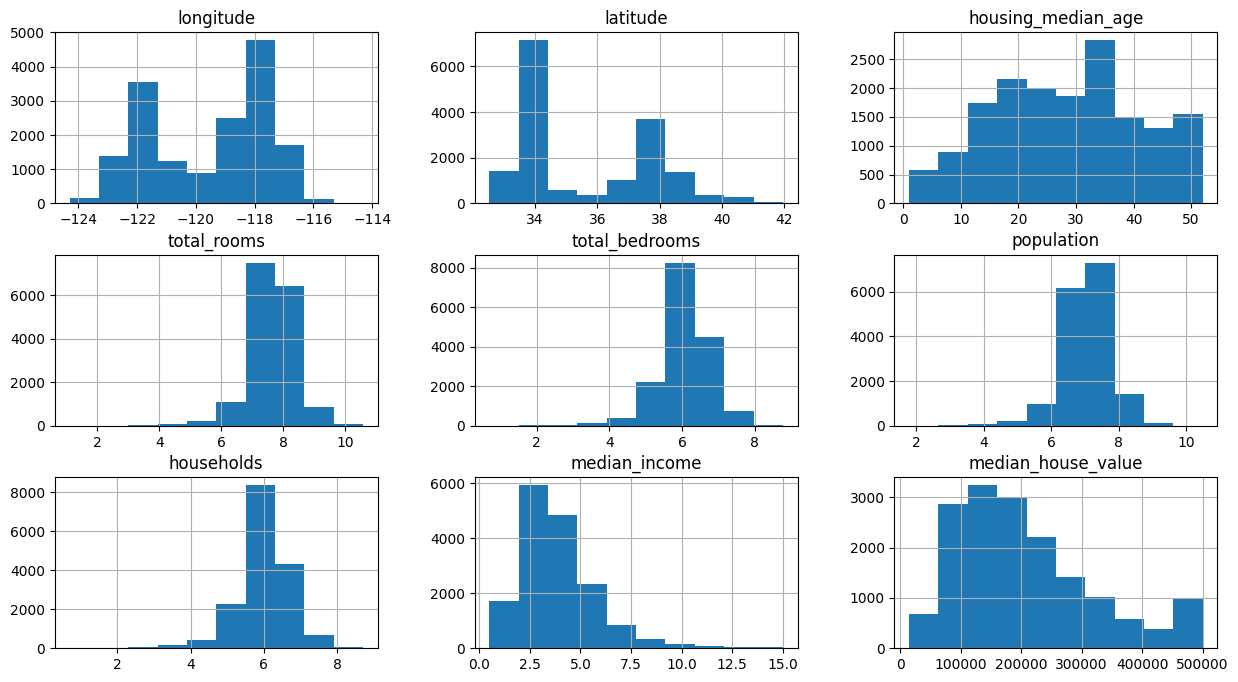

In [17]:
train_data.hist(figsize=(15, 8 ))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [22]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6623,-118.14,34.18,52.0,7.438972,5.762051,6.904751,5.799093,3.9688,175000.0,True,False,False,False,False
5499,-118.42,34.00,14.0,8.235361,7.074117,7.764721,6.886532,3.1603,287500.0,True,False,False,False,False
11098,-117.88,33.83,25.0,7.487734,5.517453,6.621406,5.529429,6.8407,266700.0,True,False,False,False,False
18553,-122.04,36.96,42.0,6.289716,4.682131,5.303305,4.653960,2.1667,196400.0,False,False,False,False,True
5078,-118.29,33.98,48.0,7.025538,5.446737,6.664409,5.411646,3.4444,93100.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-122.03,37.91,29.0,8.601350,6.770789,7.745436,6.792344,5.0362,275300.0,False,False,False,True,False
16596,-121.47,37.58,14.0,7.374629,5.680173,6.788972,5.662960,4.6625,294000.0,False,True,False,False,False
16427,-121.36,38.15,42.0,7.626570,5.814131,6.778785,5.765191,4.3553,185700.0,False,True,False,False,False
6425,-118.00,34.13,35.0,6.913737,5.416100,6.610696,5.402677,3.5481,158100.0,False,True,False,False,False


<Axes: >

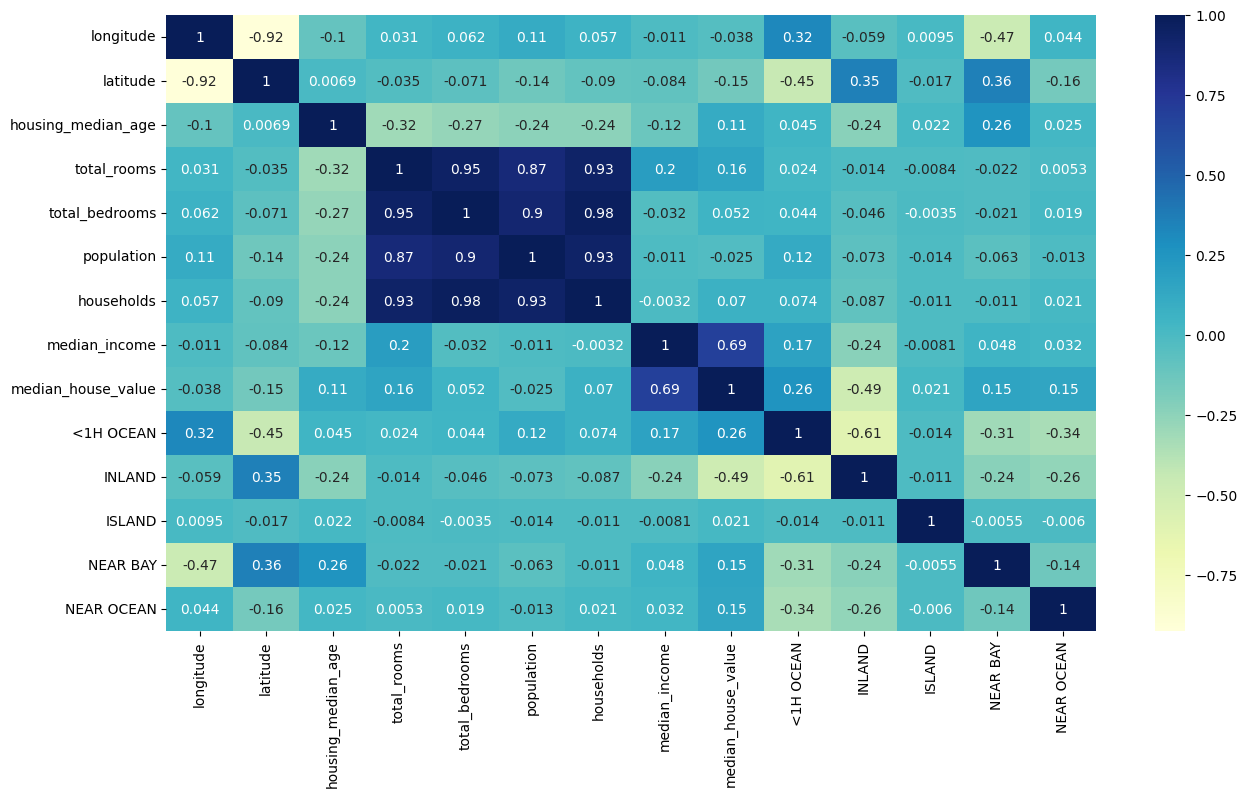

In [23]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

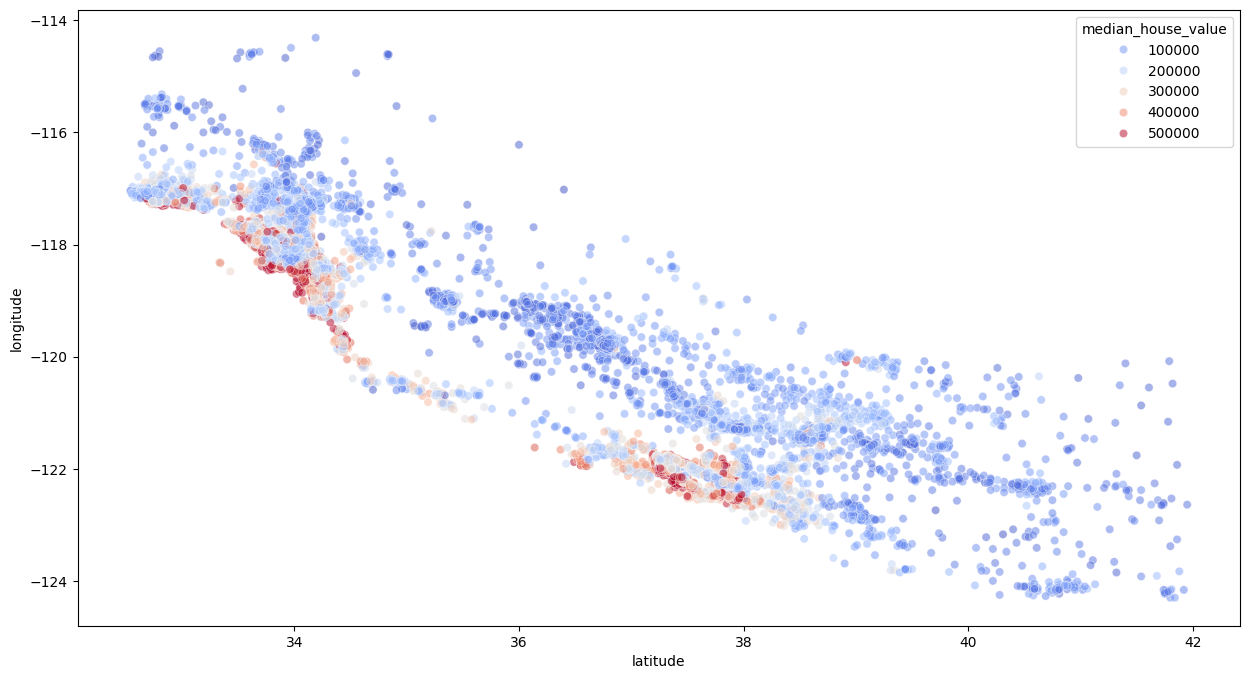

In [25]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", hue="median_house_value", data=train_data, palette="coolwarm", alpha=0.5)

In [26]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

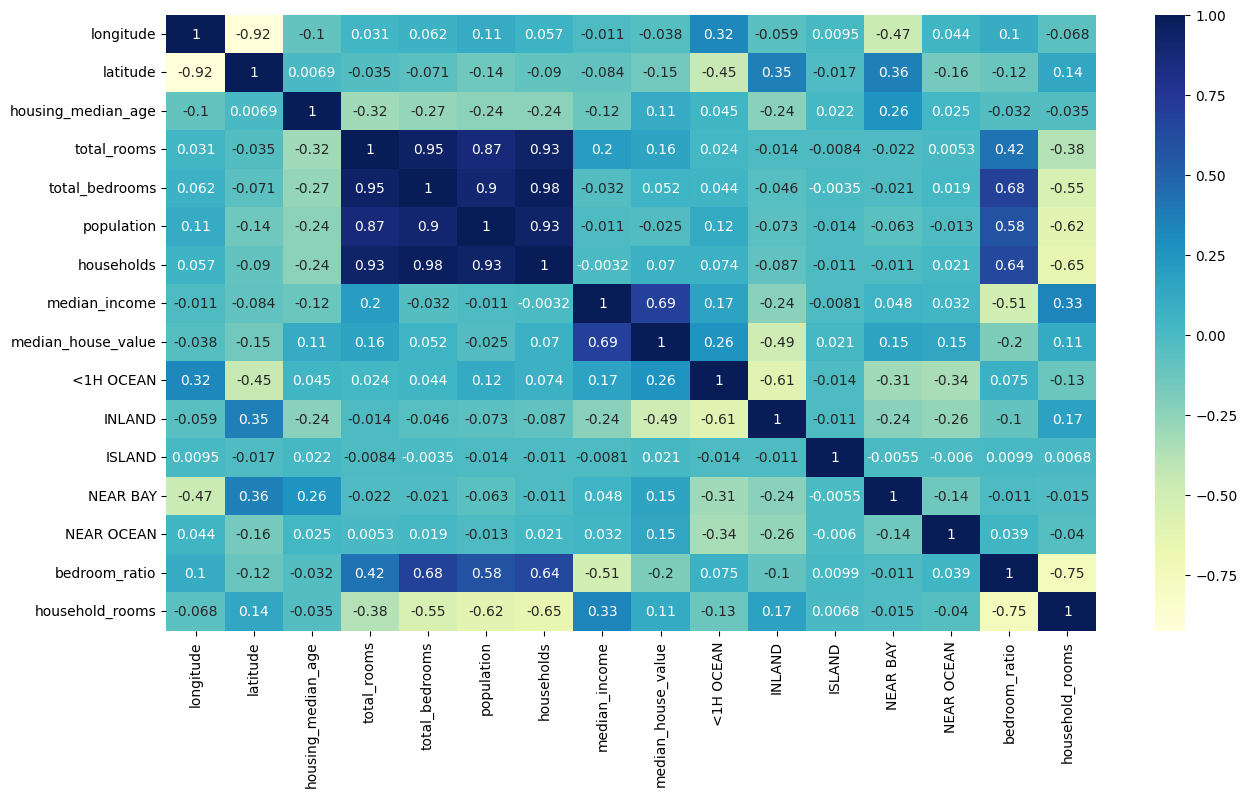

In [27]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train, y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_train_s, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

test_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19465,-120.97,37.69,15.0,8.310415,6.735780,7.594381,6.523562,3.0720,114300.0,False,True,False,False,False,0.810523,1.273908
14565,-117.20,32.84,32.0,7.617760,5.978886,6.897705,5.966147,3.2583,181400.0,False,False,False,False,True,0.784861,1.276831
18165,-122.02,37.35,17.0,7.998335,6.411818,7.290293,6.359574,5.8779,362200.0,True,False,False,False,False,0.801644,1.257684
2820,-119.02,35.41,31.0,7.761745,6.553933,7.254178,6.416732,1.3222,51400.0,False,True,False,False,False,0.844389,1.209610
20151,-119.23,34.44,34.0,8.069029,6.499787,7.268920,6.442540,2.4777,260300.0,True,False,False,False,False,0.805523,1.252461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18115,-122.02,37.30,26.0,7.592870,5.710427,6.829794,5.697093,6.7123,354600.0,True,False,False,False,False,0.752078,1.332762
1763,-122.34,37.95,45.0,7.029088,5.484797,6.555357,5.602119,3.6719,134100.0,False,False,False,True,False,0.780300,1.254719
10715,-117.84,33.65,4.0,7.408531,6.124683,6.938284,6.021023,2.2262,225000.0,True,False,False,False,False,0.826707,1.230444
19545,-120.97,37.63,39.0,7.766841,6.410175,7.624619,6.406880,1.7054,58800.0,False,True,False,False,False,0.825326,1.212266


In [40]:
X_test, y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']
X_test_s = scaler.transform(X_test)

In [41]:
reg.score(X_test_s, y_test)

0.6684256299377708